In [1]:
import numpy as np
from scipy.optimize import fsolve
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings("ignore")

# LHF = 101.4433915301741
# LHF = 140.95111524074485
# zc = 0.19362017431224843
# k = 0.01275046113857717

#dR = 76.93545898581127
#CF = 0.9809625799771842

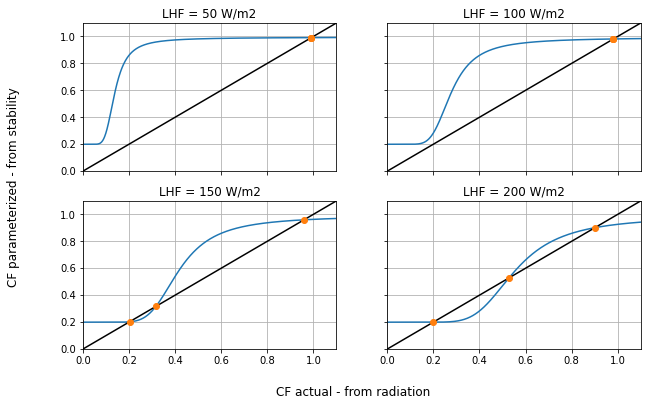

In [2]:
def CF(LHF, dR, zc):
    S = (LHF / dR) * zc
    m = 6
    Scrit = 0.55 + np.log(7)/m
    return 1 - 0.8 / (1 + np.exp(-m*(S-Scrit)))

def fun(x, LHF, zc, k):
    return CF(LHF, x, zc) - k*x

zc = 0.19362017431224843
k = 0.01275046113857717

fig,axes = plt.subplots(2,2,sharex=True,sharey=True,figsize=(10,6))
for i,LHF in enumerate([50,100,150,200]):
    ax = axes.flatten()[i]
    x = np.linspace(0,100,1000)
    CF1 = k * x
    CF2 = CF(LHF, x, zc)
    
    ax.plot(CF1, CF2, '-')
    ax.plot(CF1, CF1, 'k-')
    

    guess = [0.5/k, 0.5/k, 0.5/k]
    if LHF > 100:
        guess = [0.1/k, 0.4/k, 1.0/k]
    x0 = fsolve(fun, guess, args=(LHF, zc, k))

    ax.plot(k*x0, CF(LHF, x0, zc), 'o')
    ax.set_xlim([0,1.1])
    ax.set_ylim([0,1.1])
    ax.grid()
    ax.set_title("LHF = {:.0f} W/m2".format(LHF))

fig.supxlabel("CF actual - from radiation")
fig.supylabel("CF parameterized - from stability")
plt.show()